# Smearing Notebook for Maestro Data Files

This notebook smears .Spe data files obtained with the Maestro software for the experiments:
- Absolute determination of source activity
- Gamma-ray spectroscopy with a high resolution germanium detector

Since everyone is provided the same data files, it is recommended that you randomly smear your data first to individualise it.

For the smearing, the counts ($N$) of every bin in the spectrum are randomly smeared by their Poissonion error ($\sqrt{N}$). The channel positions are not smeared.

You should only perform the smearing **once** per data file, when you first receive your data. You should execute this smearing script for **every** single data file individually. **The smeared output files from this notebook should be used for subsequent analysis steps of the experiment.**

Please take a note of the maximum and sum values in the data files before and after smearing to check that everything worked ok - see steps 13 and 14 below and note down the numbers for each file you smear.

**Breakdown of the code cells in this notebook:**

- Step 1: Import various program modules

- Step 2: Enter input file name and extract the data. Before running this step, be sure that your input data file is uploaded to the correct folder. Either upload the file to the same folder as this notebook and put no path to the file in the file name field of the code, or create a folder and be sure that the correct path to the folder is set when entering the file name. For example, a folder called **"Example_Data"** has been created where data was uploaded for these examples. The smeared output data files from this notebook are subsequently saved in the same folder as the input file

- Step 3: The smeared data will be saved to a new output file. The location of the output file will be the same as the location of the input file. The file name will be the same as the input file, but it will be appended with "_Smeared.Spe" at the end. The output files XXXX_Smeared.Spe are the ones to analyse for the experiment

- Step 4: The length of the data file is checked

- Step 5: One row of the data is checked

- Step 6: The counts data is extracted

- Step 7: The inputted data is plotted as a spectrum of counts against MCA channel number

- Step 8: The square roots of the counts are calculated to be used in the smearing

- Step 9: The smearing function is defined

- Step 10: One value of the data is smeared to check

- Step 11: All the data is smeared

- Step 12: The smeared spectrum (yellow) is plotted on top of the original spectrum (blue)

- Step 13: Check the maximum value and the sum of the data after smearing

- Step 14: Check the maximum value and the sum of the data before smearing

- Step 15: All the data is read

- Step 16: The header of the data file is extracted

- Step 17: The header of the data file is checked

- Step 18: The footer of the data file is extracted

- Step 19: The footer of the data file is checked

- Step 20: Writing of the output file

In [1]:
# import the relevant libraries
import numpy as np
import scipy
import matplotlib.pylab as plt

In [2]:
# input the file name of the data file to be smeared - be careful about the location of the file
# extract the data
filename = './Example_Data/Example_Background_from_Maestro.Spe'
data = np.genfromtxt(filename,
                    skip_header=12,
                    skip_footer=15)
print("Input file is")
print(filename)
print("")

Input file is
./Example_Data/Example_Background_from_Maestro.Spe



In [3]:
# set the output file name to be the same as the input file name but appended by "_Smeared"
# the location of the output file will be the same as the input file
output_filename = filename.split(".Spe")[0]+"_Smeared"+".Spe"
print("Output file after smearing is:")
print(output_filename)
print("")

Output file after smearing is:
./Example_Data/Example_Background_from_Maestro_Smeared.Spe



In [4]:
# check the length of the data
NChan = len(data)
print("Number of channels is")
print(NChan)

Number of channels is
512


In [5]:
# check one row of the data
data[:10]

array([  0.,   0.,   0.,   0.,  43., 435., 275., 228., 203., 231.])

In [6]:
# check we have the data
data

array([   0.,    0.,    0.,    0.,   43.,  435.,  275.,  228.,  203.,
        231.,  187.,  209.,  204.,  245.,  253.,  253.,  276.,  311.,
        348.,  363.,  406.,  502.,  568.,  661.,  784.,  896.,  962.,
       1045., 1051., 1027., 1070., 1032., 1037., 1016.,  856.,  902.,
        956.,  881.,  921.,  889.,  880.,  874.,  873.,  841.,  816.,
        768.,  821.,  823.,  747.,  769.,  737.,  700.,  690.,  675.,
        708.,  642.,  662.,  608.,  585.,  584.,  559.,  552.,  498.,
        531.,  560.,  485.,  556.,  499.,  468.,  475.,  461.,  448.,
        454.,  429.,  405.,  443.,  402.,  378.,  378.,  378.,  336.,
        340.,  341.,  345.,  362.,  321.,  300.,  252.,  274.,  255.,
        278.,  250.,  254.,  250.,  207.,  271.,  242.,  224.,  213.,
        232.,  202.,  235.,  200.,  189.,  182.,  170.,  155.,  186.,
        172.,  171.,  174.,  162.,  169.,  211.,  183.,  148.,  164.,
        150.,  142.,  136.,  124.,  140.,  134.,  138.,  120.,  111.,
        123.,  121.,

Text(0, 0.5, '# Counts')

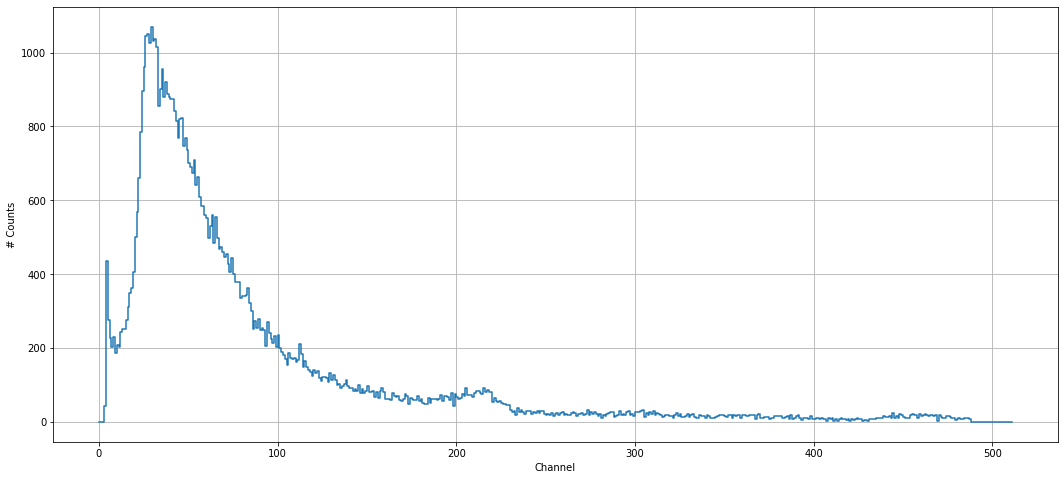

In [7]:
# the data before smearing is plotted
fig, ax = plt.subplots(figsize=(18, 8))
x = np.arange(NChan)
ax.step(x, data)
ax.grid()
ax.set_xlabel('Channel')
ax.set_ylabel('# Counts')
#ax.set_yscale('log')

In [8]:
# the Possionian errors, i.e. the square roots of the counts, are calculated to be used for smearing
np.sqrt(data)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  6.55743852,
       20.85665361, 16.58312395, 15.09966887, 14.24780685, 15.19868415,
       13.67479433, 14.45683229, 14.28285686, 15.65247584, 15.90597372,
       15.90597372, 16.61324773, 17.63519209, 18.65475811, 19.05255888,
       20.14944168, 22.4053565 , 23.83275058, 25.70992026, 28.        ,
       29.93325909, 31.01612484, 32.32645975, 32.41913015, 32.04684072,
       32.71085447, 32.12475681, 32.20248438, 31.8747549 , 29.25747768,
       30.03331484, 30.91924967, 29.68164416, 30.34798181, 29.81610303,
       29.66479395, 29.563491  , 29.54657341, 29.        , 28.56571371,
       27.71281292, 28.65309756, 28.68797658, 27.33130074, 27.73084925,
       27.14774392, 26.45751311, 26.26785107, 25.98076211, 26.60826939,
       25.33771892, 25.72936066, 24.65765601, 24.18677324, 24.16609195,
       23.64318084, 23.49468025, 22.3159136 , 23.04343724, 23.66431913,
       22.02271555, 23.57965225, 22.3383079 , 21.63330765, 21.79

In [9]:
# the semaring function is defined
def smear(y):
    output = y + (((np.random.rand()*2)-1)*np.sqrt(y))
    return int(np.abs(output))

In [10]:
# one value is smeared to check
smear(9)

11

In [11]:
# all the data is smeared
data_smeared = [smear(y) for y in data]

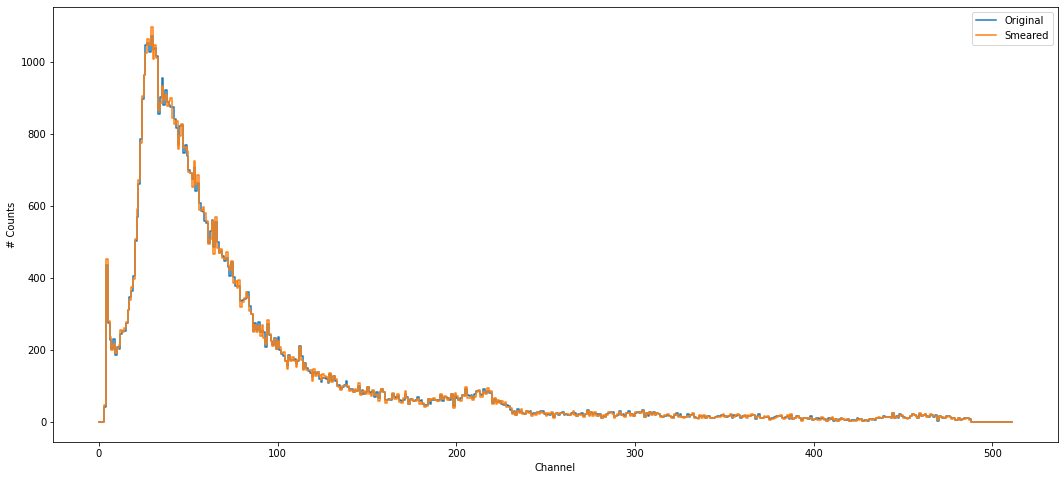

In [12]:
# the smeared spectrum (yellow) is plotted on top of the original spectrum (blue)
s = [0.01, 0.1, 0.5, 1, 10]

fig, ax = plt.subplots(figsize=(18, 8))
x = np.arange(NChan)
ax.step(x, data, label='Original')
ax.step(x, data_smeared, label='Smeared')

ax.grid()
ax.set_xlabel('Channel')
ax.set_ylabel('# Counts')
ax.grid()
ax.legend()
#ax.set_yscale('log')

In [13]:
# check the maximum and sum values of the data after smearing
print("Maximum and sum values after smearing are:")
max(data_smeared), sum(data_smeared)

Maximum and sum values after smearing are:


(1097, 67573)

In [14]:
# check the maximum and sum values of the data before smearing
print("Maximum and sum values before smearing are:")
max(data), sum(data)

Maximum and sum values before smearing are:


(1070.0, 67699.0)

In [15]:
# all the data is read
with open(filename, 'r') as f:
    content = f.readlines()

In [16]:
# the header of the data is extracted
header = content[:12]

In [17]:
# the header of the data is checked
header

['$SPEC_ID:\n',
 'count period029\n',
 '$SPEC_REM:\n',
 'DET# 4\n',
 'DETDESC# SE-PHYS-HONS-10 Model 927 SN 7149529 Input 2\n',
 'AP# Maestro Version 7.01\n',
 '$DATE_MEA:\n',
 '09/18/2020 14:01:23\n',
 '$MEAS_TIM:\n',
 '599 600\n',
 '$DATA:\n',
 '0 511\n']

In [18]:
# the footer of the data is extracted
footer = content[-15:]

In [19]:
# the footer of the data is checked
footer

['$ROI:\n',
 '1\n',
 '496 506\n',
 '$PRESETS:\n',
 'Live Time\n',
 '600\n',
 '0\n',
 '$ENER_FIT:\n',
 '0.000000 0.003079\n',
 '$MCA_CAL:\n',
 '3\n',
 '0.000000E+000 3.079070E-003 0.000000E+000 MeV\n',
 '$SHAPE_CAL:\n',
 '3\n',
 '0.000000E+000 0.000000E+000 0.000000E+000\n']

In [20]:
# the smeared data is written to the output file

if len(data_smeared) != NChan:
    print("problem with output file length - check!")
else:
    with open(output_filename, 'w') as f:

        for item in header:
            f.write(item)
        
        for item in data_smeared:
            f.write("{:>9}".format(str(item)+'\n'))
        
        for item in footer:
            f.write(item)